In [35]:
import cv2
import numpy as np
from PIL import ImageFont, ImageDraw, Image
im_name = "data/fashion_bl/sample_comparation/jenis2/kemeja93.jpg"
img = cv2.imread(im_name)
img = Image.fromarray(img)

draw = ImageDraw.Draw(img)

# use a truetype font
font = ImageFont.truetype("arial.ttf", 100)

draw.text((10, 25), "world", font=font)

img = np.array(img)
name = im_name.split('/')[-1]
name = "labelled_image/" + name
cv2.imwrite(name, img)

True

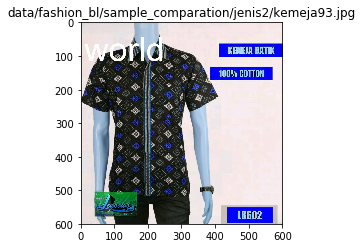

In [31]:
import matplotlib.pyplot as plt
# %matplotlib inline  

# draw image
fig = plt.figure()
ax1 = fig.add_axes((0.1, 0.2, 0.8, 0.7))
ax1.set_title(im_name)
plt.imshow(img)


In [43]:
import glob
import os
import shutil
import sys

# import list of images
DATA_DIR = "/home/mhilmiasyrofi/ocr/notebook/data/"
im_names = glob.glob(os.path.join(DATA_DIR, 'fashion_bl/', 'sample_comparation/*/*.png')) \
        + glob.glob(os.path.join(DATA_DIR, 'fashion_bl/', 'sample_comparation/*/*.jpg'))

results_sample = []
for im_name in im_names:
#     print(im_name)
    img = cv2.imread(im_name)
    img = Image.fromarray(img)

    draw = ImageDraw.Draw(img)

    # use a truetype font
    font = ImageFont.truetype("arial.ttf", 80)

    name = im_name.split('/')[-1]
    draw.text((10, 25), name, font=font)

    img = np.array(img)
    
    name = "labelled_image/" + name
    cv2.imwrite(name, img)